# <center><b>Python for Data Science</b></center>
# <center><b>Lessons 19 & 20</b></center>
# <center><b>Pandas</b></center>
# <center><b>Presentation 8: Working with Pandas DataFrames -- The Essentials (Part Four)</b></center>

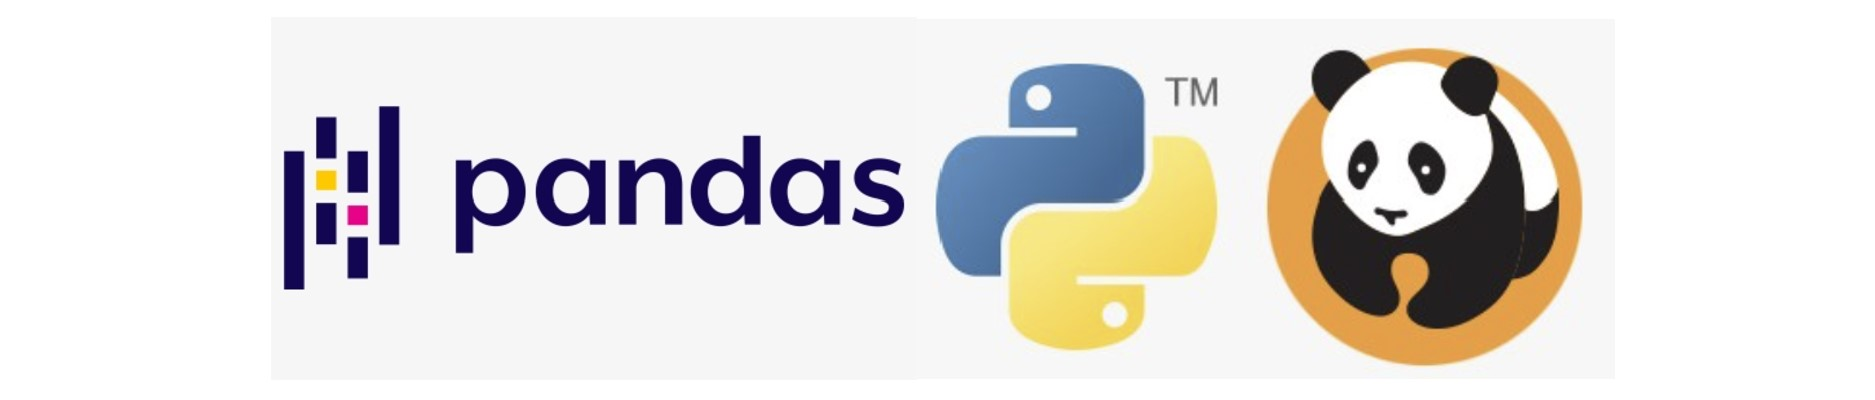

<font size="6"><center>[Link: Pandas Documentation](https://pandas.pydata.org/docs/)</center></font>

##  <span style="color:red">TABLE OF CONTENTS</span>

1. [Optimizing a data set for memory use](#1)<br>
a. [Converting data types with the astype method](#1a)<br>
&emsp;● [Converting Data Types with the astype Method](#1a1)<br>
2. [Filtering by a single condition](#2)<br>
3. [Filtering by multiple conditions](#3)<br>
a. [The AND condition](#3a)<br>
b. [The OR condition](#3b)<br>
c. [Inversion with ~](#3c)<br>
d. [Methods for Booleans](#3d)<br>
4. [Filtering by conditions](#4)<br>
a. [The isin method](#4a)<br>
b. [The between method](#4b)<br>
c. [The isnull and notnull methods](#4c)

In [1]:
# set up notebook to display multiple output in one cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print('The notebook is set up to display multiple output in one cell.')

The notebook is set up to display multiple output in one cell.


In [2]:
import pandas as pd
import numpy as np

<div class="alert alert-block alert-warning">
    <b><font size="4">Files needed for this presentation:</font></b>
</div>

[employees.csv](https://drive.google.com/file/d/10-tEEkT735Asn6Z-2ValO0jpEHGadmBR/view?usp=share_link)<br>
[netflix.csv](https://drive.google.com/file/d/19UIYcD5S6OTmnOFYjQFKpVxvA5qcv7Sh/view?usp=share_link)

***

- In previous lessons, we learned how to extract rows, columns, and cell values from a DataFrame by using the loc and iloc accessors. 
- These accessors work well when we know the index labels and positions of the rows/columns that we want to target.
- Sometimes, we may want to target rows not by an identifier but by a condition or a criterion. 
- For example, we may want to extract a subset of rows in which a column holds a specific value, for example.
- In this presentation, we will learn how to declare logical conditions that include and exclude rows from a DataFrame. 
- We will see how to combine multiple conditions by using AND and OR logic. 
- Finally, we’ll introduce some pandas utility methods that simplify the filtering process. 

<a class="anchor" id="1"></a>
# <span style="color:blue"><b>1. Optimizing a data set for memory use</b></span>

- Before we segue into filtering, let’s quickly talk about reducing memory in pandas.
- Whenever importing a data set, it’s important to consider whether each column stores its data in the most optimal type. 
- The “best” data type is the one that consumes the least memory or provides the most utility. 
- For example, integers occupy less memory than floating point numbers on most computers, so if your data set includes whole numbers, it’s ideal to import them as integers rather than floating-points. 
- As another example, if your data set includes dates, it’s ideal to import them as datetimes (note: we will learn about datetimes in more detail later) rather than as strings, which allows for datetime-specific operations. 
- In this lesson, we’ll learn some tips and tricks to shrink memory consumption by converting column data to different types, which will facilitate faster filtering later. 

- This lesson’s employees.csv data set is a fictional collection of workers at a company.
- Each record includes the employee’s first name, gender, start date at the firm, salary, manager status (True or False), and team. 
- Let’s take a look at the data set with the pd.read_csv function:

In [3]:
pd.read_csv("employees.csv")

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,8/6/93,NaN,True,Marketing
1,Thomas,Male,3/31/96,61933.0,True,NaN
2,Maria,Female,NaN,130590.0,False,Finance
3,Jerry,NaN,3/4/05,138705.0,True,Finance
4,Larry,Male,1/24/98,101004.0,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1/31/84,42392.0,False,Finance
997,Russell,Male,5/20/13,96914.0,False,Product
998,Larry,Male,4/20/13,60500.0,False,Business Dev
999,Albert,Male,5/15/12,129949.0,True,Sales


- Take a second to notice the NaNs scattered throughout the output. 
- Every column has missing values. In fact, the last row consists only of NaNs. 
- Imperfect data like this is common in the real world. Data sets can arrive with blank rows, blank columns, and more.

<b>NaN</b>

In computing, NaN , standing for <b>Not a Number</b>, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

- How can we increase the utility of our data set? 
- Our first optimization is to convert the text values in the Start Date column to datetimes with the parse_dates parameter.

**Note:**&emsp;As indicated earlier, we will be learning about datetimes in greater detail later.

In [4]:
 pd.read_csv("employees.csv", parse_dates = ["Start Date"]).head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT


- We are in a good place with the CSV import, so let’s assign the DataFrame object to a descriptive variable such as employees

In [5]:
employees = pd.read_csv("employees.csv", parse_dates = ["Start Date"])

- A few options are available for improving the speed and efficiency of DataFrame operations. 
- First, let’s summarize the data set as it currently stands. We can invoke the info method to see a list of the columns, their data types, a count of missing values, and the DataFrame’s total memory consumption:

In [6]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      999 non-null    float64       
 4   Mgmt        933 non-null    object        
 5   Team        957 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 47.0+ KB


- Let’s look at the output that was generated by the info() statement. 
- We have a DataFrame with 1,001 rows, starting at index 0 and proceeding to index 1000. There are four string columns, one datetime column, and one floating-point column. All six columns have missing data.
- Memory use currently is ~47 KB—a small amount for modern computers, but let’s try to whittle the number down. As you read the examples that will follow, focus more on the percentage reductions than on the numeric reductions. The larger your data sets grow, the more significant the performance improvement will be.

<a class="anchor" id="1a"></a>
## <span style="color:red"><b><i>a.  Converting data types with the astype method</b></span>

- Did you notice that pandas imported the Mgmt column’s values as strings? The column stores only two values: True and False. We can reduce memory use by converting the values to the more lightweight Boolean data type.
- The astype method converts a Series’ values to a different data type. It accepts a single argument: the new data type. We can pass either the data type or a string with its name.
- The next example extracts the Mgmt Series from employees and invokes its astype method with an argument of bool. Pandas returns a new Series object of Booleans. Note that the library converts NaNs to True values. We’ll discuss removing missing values in a later presentation.

In [7]:
employees["Mgmt"].astype(bool)

0        True
1        True
2       False
3        True
4        True
        ...  
996     False
997     False
998     False
999      True
1000     True
Name: Mgmt, Length: 1001, dtype: bool

- Now that we’ve previewed what the Series will look like, we can overwrite the existing Mgmt column in employees. 
- Updating a DataFrame column works similarly to setting a key-value pair in a dictionary. If a column with the specified name exists, pandas overwrites it with the new Series. If the column with the name does not exist, pandas creates a new Series and appends it to the right of the DataFrame. 
- The library matches rows in the Series and DataFrame by shared index labels.
- The next code example overwrites the Mgmt column with our new Series of Booleans. 
- As a reminder, Python evaluates the right side of the assignment operator (=) first. 
- First, we create a new Series, then we overwrite our existing Mgmt column:

<a class="anchor" id="1a1"></a>
### <span style="color:green"><b><i>Converting Data Types with the astype Method</i></b></span>

In [8]:
 employees["Mgmt"] = employees["Mgmt"].astype(bool)

- A column assignment does not produce a return value, so the code does not output anything in Jupyter Notebook. 
- Let’s take a look at the DataFrame again to see the results.

In [9]:
employees.head()
employees.tail()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT


,First Name,Gender,Start Date,Salary,Mgmt,Team
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales
1000,NaN,NaN,NaT,NaN,True,NaN


- Except for the True in the last row of missing values, the DataFrame looks no different. 
- But what about our memory use? Let’s invoke the info method again to see the difference.

In [10]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      999 non-null    float64       
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(3)
memory usage: 40.2+ KB


- We’ve reduced employees’ memory use by almost 15%, from 47 KB to 40.2 KB.
- Next, let’s transition to the Salary column. If we open the raw CSV file ([employees.csv](https://drive.google.com/file/d/10-tEEkT735Asn6Z-2ValO0jpEHGadmBR/view?usp=share_link)) , we can see that its values are stored as whole numbers.

- In employees, however, pandas stores the Salary values at floats. 
- To support the NaNs throughout the column, pandas converts the integers to floating-point numbers — which is a technical requirement of the library.
- Following our previous Boolean example, we might try to coerce the column’s values to integers with the astype method. Unfortunately, pandas raises a ValueError exception.

In [11]:
employees["Salary"].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

- Pandas is unable to convert the NaN values to integers. 
- We can solve this problem by replacing the NaN values with a constant value. 
- The fillna() method replaces a Series’ null values with the argument we pass in. 
- The next example provides a fill value of 0. 
- Note that your choice of value can distort the data; 0 is passed solely for the sake of example.
- We know that the original Salary column has a missing value in its last row. Let’s take a look at the last row after we invoke the fillna method.

In [12]:
 employees["Salary"].fillna(0).tail()

996      42392.0
997      96914.0
998      60500.0
999     129949.0
1000         0.0
Name: Salary, dtype: float64

- Now that the Salary column has no missing values, we can convert its values to integers with the astype method.

In [13]:
 employees["Salary"].fillna(0).astype(int).tail()

996      42392
997      96914
998      60500
999     129949
1000         0
Name: Salary, dtype: int32

- Next, we can overwrite the existing Salary Series in employees.

- We can make one additional optimization. 
- Pandas includes a special data type called a category, which is ideal for a column consisting of a small number of unique values relative to its total size. 
- Some everyday examples of data points with a limited number of values include gender, weekdays, blood types, planets, and income groups. Behind the scenes, pandas stores only one copy of each categorical value rather than storingduplicates across  rows.
- The nunique method can reveal the number of unique values in each DataFrame column. 
- Note that it excludes missing values (NaN) from the count by default.

In [15]:
employees.nunique()

First Name    200
Gender          2
Start Date    971
Salary        994
Mgmt            2
Team           10
dtype: int64

- The Gender and Team columns stand out as good candidates to store categorical values. 
- In 1,001 rows of data, Gender has only two unique values, and Team has only ten unique values.
- Let’s use the astype method again. First, we’ll convert the Gender column’s values to categories by passing an argument of "category" to the method.

In [16]:
employees["Gender"].astype("category")

0         Male
1         Male
2       Female
3          NaN
4         Male
         ...  
996       Male
997       Male
998       Male
999       Male
1000       NaN
Name: Gender, Length: 1001, dtype: category
Categories (2, object): ['Female', 'Male']

-  has identified two unique categories: "Female" and "Male". 
- We are good to overwrite our existing Gender column.

In [18]:
 employees["Gender"] = employees["Gender"].astype("category")

- Let’s check in on the memory use by invoking the info method. 
- We will see that memory use has dropped significantly once again because pandas has to keep track of only two values instead of 1,001.

In [19]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    category      
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      999 non-null    float64       
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    object        
dtypes: bool(1), category(1), datetime64[ns](1), float64(1), object(2)
memory usage: 33.5+ KB


- Let’s repeat the same process for the Team column, which has only ten unique values.

In [21]:
employees["Team"] = employees["Team"].astype("category")

In [22]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    category      
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      999 non-null    float64       
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    category      
dtypes: bool(1), category(2), datetime64[ns](1), float64(1), object(1)
memory usage: 27.0+ KB


- With fewer than ten lines of code, we’ve reduced the DataFrame’s memory consumption by more than 40%. 
- Imagine that impact on data sets with millions of rows!

<a class="anchor" id="2"></a>
# <span style="color:blue"><b>2. Filtering by a single condition</b></span>

- Extracting a subset of data is perhaps the most common operation in data analysis. 
- A subset is a portion of a larger data set that fits some kind of condition.
- Suppose that we want to generate a list of all employees named "Maria". 
- To accomplish this task, we need to filter our employees data set based on the values in the First Name column. 
- The list of employees named Maria is a subset of all employees.
- First, a quick reminder of how equality works in Python. The equality operator (==) compares the equality of two objects in Python, returning True if the objects are equal and False if they are unequal. 
- A simple example can be found in the cell below.

In [23]:
"Maria" == "Maria"
"Maria" == "Sarah"

True

False

- To compare every Series entry with a constant value, we place the Series on one side of the equality operator and the value on the other:<br>

&emsp;&emsp;<b>Series == value</b><br>

- One might think that this syntax would lead to an error, but pandas is smart enough to recognize that we want to compare the equality of each Series value with the specified string, not with the Series itself. 
- When we combine a Series with an equality operator, pandas returns a Series of Booleans. 
- The next example compares each First Name column value with "Maria". 
- A True value indicates that the string "Maria" does occur at that index, and a False value indicates that it does not. 
- The following output communicates that index 2 stores the value "Maria".

In [24]:
employees["First Name"] == "Maria"

0       False
1       False
2        True
3       False
4       False
        ...  
996     False
997     False
998     False
999     False
1000    False
Name: First Name, Length: 1001, dtype: bool

- If we could extract only the rows with a True value above from our employees DataFrame, we would have all the "Maria" records in the data set. 
- Luckily, pandas offers a convenient syntax for extracting rows by using a Boolean Series. 
- To filter rows, we provide the Boolean Series between square brackets following the DataFrame.

In [25]:
employees[employees["First Name"] == "Maria"]

,First Name,Gender,Start Date,Salary,Mgmt,Team
2,Maria,Female,NaT,130590.0,False,Finance
198,Maria,Female,1990-12-27,36067.0,True,Product
815,Maria,NaN,1986-01-18,106562.0,False,HR
844,Maria,NaN,1985-06-19,148857.0,False,Legal
936,Maria,Female,2003-03-14,96250.0,False,Business Dev
984,Maria,Female,2011-10-15,43455.0,False,Engineering


- Great success! We’ve used our Boolean Series to filter rows with a value of "Maria" in the First Name column.

- If the use of multiple square brackets is confusing, you can assign the Boolean Series to a descriptive variable and then pass the variable into the square brackets instead. 
- The following code yields the same subset of rows as the preceding code:


In [27]:
marias = employees["First Name"] == "Maria"
 
employees[marias]

,First Name,Gender,Start Date,Salary,Mgmt,Team
2,Maria,Female,NaT,130590.0,False,Finance
198,Maria,Female,1990-12-27,36067.0,True,Product
815,Maria,NaN,1986-01-18,106562.0,False,HR
844,Maria,NaN,1985-06-19,148857.0,False,Legal
936,Maria,Female,2003-03-14,96250.0,False,Business Dev
984,Maria,Female,2011-10-15,43455.0,False,Engineering


- The most common mistake beginners make when comparing the equality of values is using one equal sign instead of two. 
- Remember that a single equal sign assigns an object to a variable, and two equal signs check for equality between objects. 
- If we accidentally used a single equal sign in this example, we would overwrite all the First Name column’s values with the string "Maria". 

*** 

- Let’s try another example. What if we want to extract a subset of employees who are not on the Finance team? 
- The protocol remains the same, but with a slight twist.
- We need to generate a Boolean Series that checks which of the Team column’s values are not equal to "Finance". Then we can use the Boolean Series to filter employees. 
- Python’s inequality operator returns True if two values are not equal and False if they are equal.

In [28]:
employees["Team"] != "Finance"

0        True
1        True
2       False
3       False
4        True
        ...  
996     False
997      True
998      True
999      True
1000     True
Name: Team, Length: 1001, dtype: bool

- Now that we have our Boolean Series, we can pass it inside square brackets to extract the DataFrame rows with a value of True. - In the following output, we see that pandas has excluded the rows at indexes 2 and 3 because the Team value there is "Finance".

In [29]:
 employees[employees["Team"] != "Finance"]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


- Note that the results include rows with missing values. We can see an example at index 1000. In this scenario, pandas considers a NaN to be unequal to the string "Finance".
- What if we want to retrieve all the managers in the company? 
- Managers have a value of True in the Mgmt column. 
- We could execute employees["Mgmt"] == True, but we don’t need to because Mgmt is already a Series of Booleans. 
- The True values and False values already indicate whether pandas should keep or discard a row. 
- Therefore, we can pass the Mgmt column by itself inside the square brackets.

In [30]:
employees[employees["Mgmt"]].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
6,Ruby,Female,1987-08-17,65476.0,True,Product


- We can also use arithmetic operands to filter columns based on mathematical conditions. 
- The next example generates a Boolean Series for Salary values greater than $100,000.

In [31]:
high_earners = employees["Salary"] > 100000
 
high_earners.head()

0    False
1    False
2     True
3     True
4     True
Name: Salary, dtype: bool

- Next let’s see which employees earn a salary above $100,000:

In [33]:
 employees[high_earners].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
9,Frances,Female,2002-08-08,139852.0,True,Business Dev


- To summarize: As long as you provide a Boolean Series, pandas will be able to filter the DataFrame.

<a class="anchor" id="3"></a>
# <span style="color:blue"><b>3. Filtering by multiple conditions</b></span>

- We can filter a DataFrame with multiple conditions by creating two independent Boolean Series and then declaring the logical criterion that pandas should apply between them.

<a class="anchor" id="3a"></a>
## <span style="color:red"><b><i>a. The AND condition</b></span>

- Suppose that we want to find all female employees who work on the business development team. 
- Now pandas must look for two conditions to select a row: a value of "Female" in the Gender column and a value of "Business Dev" in the Team column. 
- The two criteria are independent, but both must be met. 
- Here’s a quick reminder of how AND logic works with two conditions.

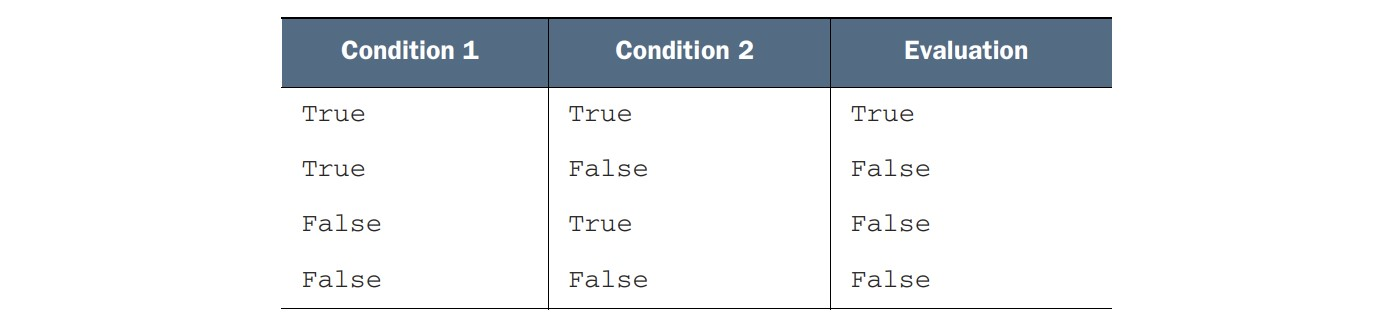


- Let’s construct one Boolean Series at a time. We can begin by isolating the "Female" values in the Gender column.

In [42]:
is_female = employees["Gender"] == "Female"

- Next, we’ll target all employees who work on the "Business Dev" team.

In [43]:
 in_biz_dev = employees["Team"] == "Business Dev"

- Finally, we need to calculate the intersection of the two Series, the rows in which both the is_female and in_biz_dev Series have True values. 
- Pass both Series into the square brackets, and place an ampersand symbol (&) between them. 
- The ampersand declares an AND logical criterion. 
- The is_female Series must have True and the in_biz_dev Series must have True.

In [44]:
 employees[is_female & in_biz_dev].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
33,Jean,Female,1993-12-18,119082.0,False,Business Dev
36,Rachel,Female,2009-02-16,142032.0,False,Business Dev
38,Stephanie,Female,1986-09-13,36844.0,True,Business Dev
61,Denise,Female,2001-11-06,106862.0,False,Business Dev


- We can include any amount of Series within the square brackets as long as we separate every subsequent two with a & symbol. - - The next example adds a third criterion to identify the female managers on the business development team.

In [45]:
is_manager = employees["Mgmt"]
 
employees[is_female & in_biz_dev & is_manager].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
38,Stephanie,Female,1986-09-13,36844.0,True,Business Dev
66,Nancy,Female,2012-12-15,125250.0,True,Business Dev
92,Linda,Female,2000-05-25,119009.0,True,Business Dev
111,Bonnie,Female,1999-12-17,42153.0,True,Business Dev


- In summary, the & symbol selects rows that fit all conditions. 
- Declare two or more Boolean Series and then use the ampersand to weave them together.

<a class="anchor" id="3b"></a>
## <span style="color:red"><b><i>b. The OR condition</b></span>

- We can also extract rows if they fit one of several conditions. 
- Not all conditions have to be true, but at least one does. 
- Here’s a quick reminder of how OR logic works with two conditions.

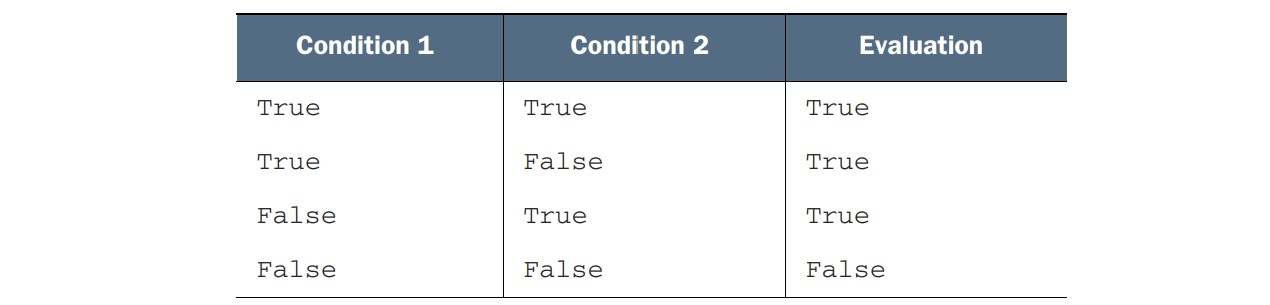

- Suppose that we want to identify all employees with a Salary below $40,000 or a Start Date after January 1, 2015. 
- We can use mathematical operators such as < and > to arrive at two separate Boolean Series for these conditions.

In [46]:
earning_below_40k = employees["Salary"] < 40000
 
started_after_2015 = employees["Start Date"] > "2015-01-01"

- We use a pipe symbol ( | ) between Boolean Series to declare OR criteria. 
- The next example selects the rows in which either of the Boolean Series holds a True value.

In [47]:
employees[earning_below_40k | started_after_2015].tail()

,First Name,Gender,Start Date,Salary,Mgmt,Team
949,Scott,Male,2011-08-20,37385.0,True,Business Dev
958,Gloria,Female,1987-10-24,39833.0,False,Engineering
964,Bruce,Male,1980-05-07,35802.0,True,Sales
967,Thomas,Male,2016-03-12,105681.0,False,Engineering
989,Justin,NaN,1991-02-10,38344.0,False,Legal


- The rows at index positions 949, 958, 964, and 989, fit the Salary condition, and the row at index 967 fits the Start Date condition. 
- Pandas will also include rows that fit both conditions.

<a class="anchor" id="3c"></a>
## <span style="color:red"><b><i>c. Inversion with ~</b></span>

- The tilde symbol (~) inverts the values in a Boolean Series. 
- All True values become False, and all False values become True. 
- Here’s a simple example with a small Series.

In [51]:
my_series = pd.Series([True, False, True])
 
my_series

0     True
1    False
2     True
dtype: bool

In [52]:
 ~my_series

0    False
1     True
2    False
dtype: bool

- Inversion is helpful when we’d like to reverse a condition. 
- Let’s say we want to identify employees with a Salary of less than $100,000. 
- We could use two approaches, the first of which is to write employees["Salary"] < 100000.

In [59]:
employees[employees["Salary"] < 100000].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
9,Frances,Female,2002-08-08,139852.0,True,Business Dev


- Alternatively, we could invert the results set of employees earning more than or equal to $100,000. 
- The resulting DataFrames will be identical. 
- In the next example, we wrap our greater than operation inside a parenthesis. 
- The syntax ensures that pandas generates the Boolean Series before inverting its values. 
- In general, you should use parentheses whenever the order of evaluation may be unclear to pandas.

In [60]:
employees[~(employees["Salary"] >= 100000)].head(6)

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
6,Ruby,Female,1987-08-17,65476.0,True,Product
7,NaN,Female,2015-07-20,45906.0,True,Finance
8,Angela,Female,2005-11-22,95570.0,True,Engineering
10,Louise,Female,1980-08-12,63241.0,True,NaN


- <b>Note:</b>&emsp;The NaN in the top row is creating a small inconsistency in the results.  Usually NaN's(missing values, etc.) will be taken care of before the filtering is done so this won't typically be a problem.
- <b>TIP</b>&emsp;For complex extractions like this one, consider assigning the Boolean
Series to a descriptive variable.

<a class="anchor" id="3d"></a>
## <span style="color:red"><b><i>d. Methods for Booleans</b></span>

- Pandas provides an alternative syntax for analysts who prefer methods over operators.
- The following table displays the method alternatives for equality, inequality, and other arithmetic operations.

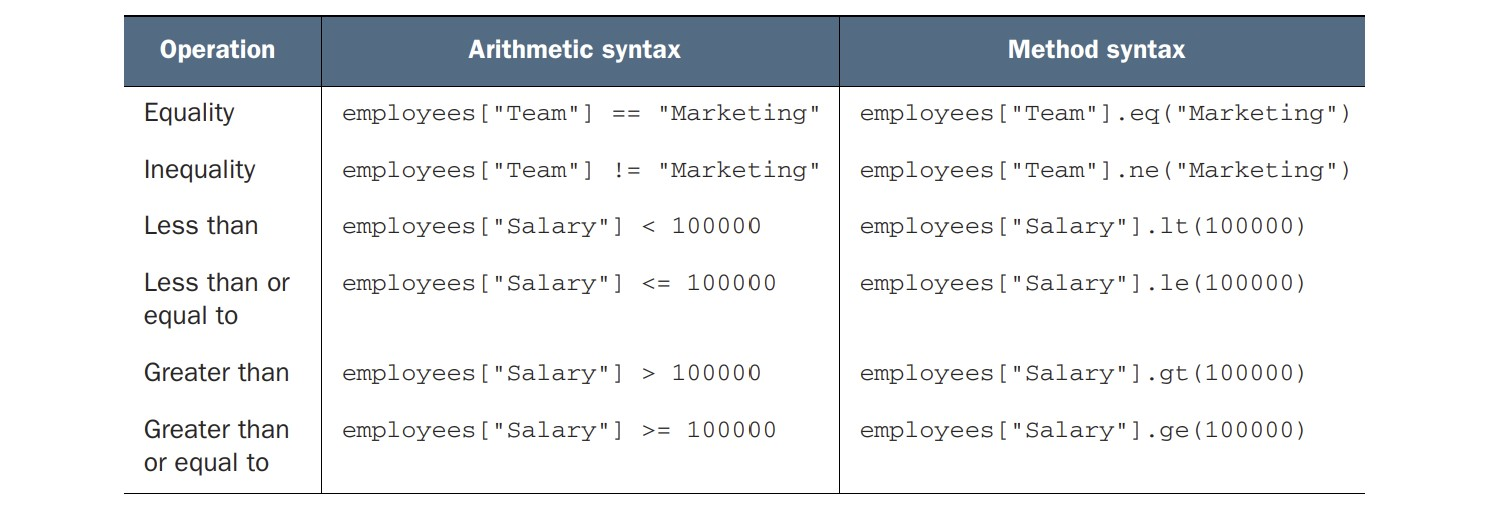

- The same rules apply regarding the use of & and | symbols for AND/OR logic.

<a class="anchor" id="4"></a>
# <span style="color:blue"><b>4. Filtering by conditions</b></span>

- Some filtering operations are more complex than simple equality or inequality checks. 
- Luckily, pandas provides many helper methods that generate Boolean Series for these types of extractions.

<a class="anchor" id="4a"></a>
## <span style="color:red"><b><i>a. The isin method</b></span>

- What if we want to isolate the employees who belong to either the Sales, Legal, or Marketing team? We could provide three separate Boolean Series inside the square brackets and add the | symbol to declare OR criteria.

In [62]:
 sales = employees["Team"] == "Sales"
 legal = employees["Team"] == "Legal"
 mktg = employees["Team"] == "Marketing"
    
 employees[sales | legal | mktg].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
5,Dennis,Male,1987-04-18,115163.0,False,Legal
11,Julie,Female,1997-10-26,102508.0,True,Legal
13,Gary,Male,2008-01-27,109831.0,False,Sales
20,Lois,NaN,1995-04-22,64714.0,True,Legal


- Although this solution works, it isn’t scalable. 
- What if our next report asked for employees from 15 teams instead of three? 
- Declaring a Series for each condition is laborious.
- A better solution is the isin method, which accepts an iterable of elements (list, tuple, Series, and so on) and returns a Boolean Series. 
- True denotes that pandas found the row’s value among the iterable’s values, and False denotes that it did not.
- When we have the Series, we can use it to filter the DataFrame in the usual manner.
- The next example achieves the same result set.

In [63]:
all_star_teams = ["Sales", "Legal", "Marketing"]
 
on_all_star_teams = employees["Team"].isin(all_star_teams)
 
employees[on_all_star_teams].head()


,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
5,Dennis,Male,1987-04-18,115163.0,False,Legal
11,Julie,Female,1997-10-26,102508.0,True,Legal
13,Gary,Male,2008-01-27,109831.0,False,Sales
20,Lois,NaN,1995-04-22,64714.0,True,Legal


- An optimal situation for using the isin method is when we do not know the comparison collection in advance, such as when it is generated dynamically.

<a class="anchor" id="4b"></a>
## <span style="color:red"><b><i>b. The between method</b></span>

- When working with numbers or dates, we often want to extract values that fall within a range. 
- Suppose that we want to identify all employees with a salary between $80,000 and $90,000. 
- We could create two Boolean Series, one to declare the lower bound and one to declare the upper bound. 
- Then we could use the & operator to mandate that both conditions are True.

In [65]:
 higher_than_80 = employees["Salary"] >= 80000
 lower_than_90 = employees["Salary"] < 90000

 employees[higher_than_80 & lower_than_90].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
19,Donna,Female,2010-07-22,81014.0,False,Product
31,Joyce,NaN,2005-02-20,88657.0,False,Product
35,Theresa,Female,2006-10-10,85182.0,False,Sales
45,Roger,Male,1980-04-17,88010.0,True,Sales
54,Sara,Female,2007-08-15,83677.0,False,Engineering


- A slightly cleaner solution is to use a method called between, which accepts a lower bound and an upper bound; it returns a Boolean Series where True denotes that a row’s value falls between the specified interval. 
- Note that the first argument, the lower bound, is inclusive, and the second argument, the upper bound, is exclusive. 
- The following code returns the same DataFrame as the preceding code, filtering for salaries between 80,000 and 90,000.

In [66]:
between_80k_and_90k = employees["Salary"].between(80000, 90000)
 
employees[between_80k_and_90k].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
19,Donna,Female,2010-07-22,81014.0,False,Product
31,Joyce,NaN,2005-02-20,88657.0,False,Product
35,Theresa,Female,2006-10-10,85182.0,False,Sales
45,Roger,Male,1980-04-17,88010.0,True,Sales
54,Sara,Female,2007-08-15,83677.0,False,Engineering


- The between method also works on columns of other data types. 
- To filter datetimes, we can pass strings for the start and end dates of our time range. 
- The keyword parameters for the first and second arguments of the method are left and right. 
- Here, we find all employees who started with the company in the 1980's.

In [67]:
 eighties_folk = employees["Start Date"].between(left = "1980-01-01", right = "1990-01-01")
    
 employees[eighties_folk].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
10,Louise,Female,1980-08-12,63241.0,True,NaN
12,Brandon,Male,1980-12-01,112807.0,True,HR
17,Shawn,Male,1986-12-07,111737.0,False,Product


- We can also apply the between method to string columns. 
- Let’s extract all employees whose first names starts with the letter "R". 
- We’ll start with a capital "R" as our inclusive lower bound and go up to the noninclusive upper bound of "S".

In [68]:
name_starts_with_r = employees["First Name"].between("R", "S")

employees[name_starts_with_r].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
6,Ruby,Female,1987-08-17,65476.0,True,Product
36,Rachel,Female,2009-02-16,142032.0,False,Business Dev
45,Roger,Male,1980-04-17,88010.0,True,Sales
67,Rachel,Female,1999-08-16,51178.0,True,Finance
78,Robin,Female,1983-06-04,114797.0,True,Sales


- As always, be mindful of case sensitivity when working with characters and strings.

<a class="anchor" id="4c"></a>
## <span style="color:red"><b><i>c. The isnull and notnull methods</b></span>

- The employees data set includes plenty of missing values. 
- We can see a few missing values in our first five rows.

In [70]:
employees.head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT


- Pandas marks missing text values and missing numeric values with a NaN (not a number) designation, and it marks missing datetime values with a NaT (not a time) designation. 
- We can see an example in the Start Date column at index position 2.
- We can use several pandas methods to isolate rows with either null or present values in a given column. 
- The isnull method returns a Boolean Series in which True denotes that a row’s value is missing:

In [71]:
 employees["Team"].isnull().head()

0    False
1     True
2    False
3    False
4    False
Name: Team, dtype: bool

- Pandas considers the NaT and None values to be null as well. 
- The next example invokes the isnull method on the Start Date column.

In [73]:
employees["Start Date"].isnull().head()

0    False
1    False
2     True
3    False
4    False
Name: Start Date, dtype: bool

- The notnull method returns the inverse Series, one in which True indicates that a row’s value is present. 
- The following output communicates that indices 0, 2, 3, and 4 do not have missing values.

In [74]:
employees["Team"].notnull().head()

0     True
1    False
2     True
3     True
4     True
Name: Team, dtype: bool

In [75]:
employees["Team"].notnull().head()

0     True
1    False
2     True
3     True
4     True
Name: Team, dtype: bool

- We can produce the same result set by inverting the Series returned by the isnull method. 
- As a reminder, we use the tilde symbol (~) to invert a Boolean Series.

In [76]:
 (~employees["Team"].isnull()).head()

0     True
1    False
2     True
3     True
4     True
Name: Team, dtype: bool

- Either approach works, but notnull is a bit more descriptive and thus is recommended.
- As always, we can use these Boolean Series to extract specific DataFrame rows. 
- Here, we extract all employees with a missing Team value.

In [77]:
 no_team = employees["Team"].isnull()
    
 employees[no_team].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
1,Thomas,Male,1996-03-31,61933.0,True,NaN
10,Louise,Female,1980-08-12,63241.0,True,NaN
23,NaN,Male,2012-06-14,125792.0,True,NaN
32,NaN,Male,1998-08-21,122340.0,True,NaN
91,James,NaN,2005-01-26,128771.0,False,NaN


- The next example pulls out employees with a present First Name value.

In [78]:
has_name = employees["First Name"].notnull()

employees[has_name].tail()

,First Name,Gender,Start Date,Salary,Mgmt,Team
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


- The isnull and notnull methods are the best way to quickly filter for present and missing values in one or more rows.